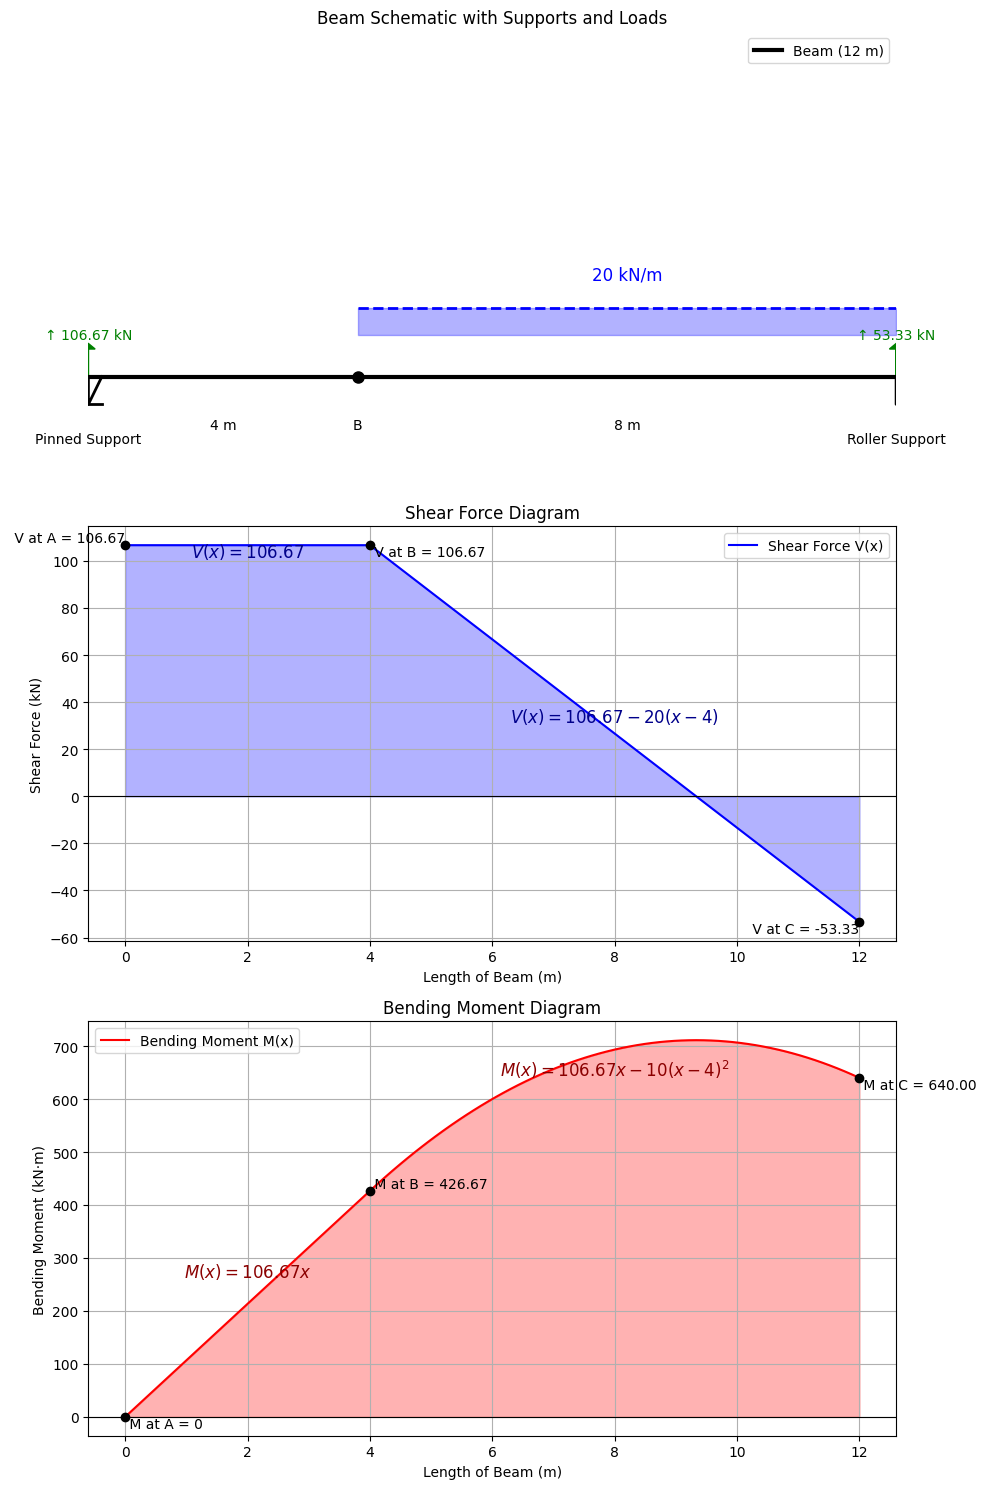

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given data (in kN and m)
L1 = 4   # m (distance from A to B)
L2 = 8   # m (distance from B to C)
L = L1 + L2  # m (total length of beam, 12 m)
w = 20   # kN/m (distributed load between B and C, 4 to 12 m)

# Calculate reactions at supports (A at 0 m, C at 12 m, B not a support)
# Total force from distributed load (20 kN/m over 8 m) = 160 kN, centroid at x = 8 m
# RA + RC - 160 = 0
# RA * 12 - 160 * 8 = 0
# RA = 1280 / 12 ≈ 106.667 kN
# RC = 160 - 106.667 ≈ 53.333 kN
RA = 106.667  # kN (reaction at A, upward, pinned support)
RB = 0        # kN (no reaction at B, assuming B is not a support)
RC = 53.333   # kN (reaction at C, upward, roller support)

# Discretized x values along the beam
x = np.linspace(0, L, 100)

# Define the piecewise shear force function:
# For 0 ≤ x < 4:  V(x) = RA = 106.667 kN
# For 4 ≤ x ≤ 12:  V(x) = 106.667 - 20(x - 4)
V = np.piecewise(x, [x < L1, x >= L1],
                 [lambda x: 106.667, 
                  lambda x: 106.667 - 20 * (x - 4)])

# Define the piecewise bending moment function:
# For 0 ≤ x < 4:  M(x) = RA * x = 106.667x
# For 4 ≤ x ≤ 12:  M(x) = 106.667x - (20 * (x - 4)^2) / 2
M = np.piecewise(x, [x < L1, x >= L1],
                 [lambda x: 106.667 * x, 
                  lambda x: 106.667 * x - 10 * (x - 4)**2])

# Create subplots: beam schematic, shear force, then bending moment
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

# -------------------------
# Beam Schematic
# -------------------------
ax1.set_xlim(0, L)
ax1.set_ylim(-5, 25)
ax1.axis('off')
ax1.set_title("Beam Schematic with Supports and Loads")

# Draw the beam (horizontal line) with dimensions
ax1.plot([0, 12], [0, 0], 'k-', linewidth=3, label="Beam (12 m)")
# Add dimension labels
ax1.text(2, -3, '4 m', horizontalalignment='center', verticalalignment='top')
ax1.text(8, -3, '8 m', horizontalalignment='center', verticalalignment='top')

# Supports (triangles with labels for types)
# Pinned support at A (0 m) - triangle with base
ax1.plot([0, 0, 0.2], [0, -2, 0], 'k-', linewidth=2)  # Triangle
ax1.plot([0, 0.2], [-2, -2], 'k-', linewidth=2)  # Base for pinned
ax1.text(0, -4, 'Pinned Support', horizontalalignment='center', verticalalignment='top')

# Roller support at C (12 m) - triangle
ax1.plot([12, 12, 12.2], [0, -2, 0], 'k-', linewidth=2)  # Triangle
ax1.text(12, -4, 'Roller Support', horizontalalignment='center', verticalalignment='top')

# No support at B (4 m), but mark the point
ax1.plot(4, 0, 'ko', markersize=8)  # Black dot for B
ax1.text(4, -3, 'B', horizontalalignment='center', verticalalignment='top')

# Distributed load (20 kN/m from 4 m to 12 m)
dist_load_x = np.linspace(4, 12, 20)
dist_load_y = np.zeros_like(dist_load_x) + 5  # Above the beam for visibility
ax1.plot(dist_load_x, dist_load_y, 'b--', linewidth=2)
ax1.fill_between(dist_load_x, dist_load_y, dist_load_y - 2, color='blue', alpha=0.3)
ax1.text(8, 7, '20 kN/m', horizontalalignment='center', fontsize=12, color='blue')

# Reactions (upward arrows)
ax1.arrow(0, 0, 0, 2, head_width=0.2, head_length=0.4, fc='green', ec='green')
ax1.text(0, 2.5, f'↑ {RA:.2f} kN', horizontalalignment='center', verticalalignment='bottom', color='green')
ax1.arrow(12, 0, 0, 2, head_width=0.2, head_length=0.4, fc='green', ec='green')
ax1.text(12, 2.5, f'↑ {RC:.2f} kN', horizontalalignment='center', verticalalignment='bottom', color='green')

ax1.legend()

# -------------------------
# Shear Force Diagram
# -------------------------
ax2.plot(x, V, label="Shear Force V(x)", color='blue')
ax2.fill_between(x, V, color='blue', alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.set_title("Shear Force Diagram")
ax2.set_xlabel("Length of Beam (m)")
ax2.set_ylabel("Shear Force (kN)")
ax2.grid(True)
ax2.legend()

# Key shear values at supports (A, B, C)
V_A = 106.667  # at x = 0
V_B = 106.667 - 20 * (4 - 4)  # at x = 4
V_C = 106.667 - 20 * (12 - 4)  # at x = 12

# Mark key points for shear
ax2.scatter([0, 4, 12], [V_A, V_B, V_C], color='black', zorder=3)
ax2.text(0, V_A, f" V at A = {V_A:.2f}", verticalalignment='bottom', horizontalalignment='right')
ax2.text(4, V_B, f" V at B = {V_B:.2f}", verticalalignment='top', horizontalalignment='left')
ax2.text(12, V_C, f" V at C = {V_C:.2f}", verticalalignment='top', horizontalalignment='right')

# Annotate the shear equations on each segment
# For 0 ≤ x < 4, at x = 2
x_poly1_s = 2
V_poly1 = 106.667  # Constant
ax2.text(x_poly1_s, V_poly1 - 5, r'$V(x)=106.67$', 
         horizontalalignment='center', fontsize=12, color='darkblue')

# For 4 ≤ x ≤ 12, at x = 8
x_poly2_s = 8
V_poly2 = 106.667 - 20 * (x_poly2_s - 4)  # 106.667 - 20 * 4 = -66.333
ax2.text(x_poly2_s, V_poly2 + 5, r'$V(x)=106.67-20(x-4)$', 
         horizontalalignment='center', fontsize=12, color='darkblue')

# -------------------------
# Bending Moment Diagram
# -------------------------
ax3.plot(x, M, label="Bending Moment M(x)", color='red')
ax3.fill_between(x, M, color='red', alpha=0.3)
ax3.axhline(0, color='black', linewidth=0.8)
ax3.set_title("Bending Moment Diagram")
ax3.set_xlabel("Length of Beam (m)")
ax3.set_ylabel("Bending Moment (kN·m)")
ax3.grid(True)
ax3.legend()

# Key moment values at supports (A, B, C)
M_A = 0  # at x = 0
M_B = 106.667 * 4  # at x = 4
M_C = 106.667 * 12 - 10 * (12 - 4)**2  # at x = 12

# Mark key points for moment
ax3.scatter([0, 4, 12], [M_A, M_B, M_C], color='black', zorder=3)
ax3.text(0, M_A, " M at A = 0", verticalalignment='top')
ax3.text(4, M_B, f" M at B = {M_B:.2f}", verticalalignment='bottom')
ax3.text(12, M_C, f" M at C = {M_C:.2f}", verticalalignment='top')

# Annotate the moment equations on each segment
# For 0 ≤ x < 4, at x = 2
x_poly1 = 2
M_poly1 = 106.667 * x_poly1  # 213.334
ax3.text(x_poly1, M_poly1 + 50, r'$M(x)=106.67x$', 
         horizontalalignment='center', fontsize=12, color='darkred')

# For 4 ≤ x ≤ 12, at x = 8
x_poly2 = 8
M_poly2 = 106.667 * x_poly2 - 10 * (x_poly2 - 4)**2  # 426.668 - 10 * 16 = 266.668
ax3.text(x_poly2, M_poly2 - 50, r'$M(x)=106.67x-10(x-4)^2$', 
         horizontalalignment='center', fontsize=12, color='darkred')

plt.tight_layout()
plt.show()